# 线性回归演示
作者：周伟光
本报告旨在通过一个简单的例子，阐述一元线性回归。
本代码具体的说明，请看《手把手教你用Python写线性回归》:
http://blog.csdn.net/juwikuang/article/details/78420337

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 数据探索 Data Exploration
数据来源于周伟光自己的文章《一个公式告诉你为什么程序员要转算法工程师》

http://blog.csdn.net/juwikuang/article/details/73057194

In [2]:
x = [13854,12213,11009,10655,9503] #程序员工资，顺序为北京，上海，杭州，深圳，广州
x = np.reshape(x,newshape=(5,1)) / 10000.0
y =  [21332, 20162, 19138, 18621, 18016] #算法工程师，顺序和上面一致
y = np.reshape(y,newshape=(5,1)) / 10000.0

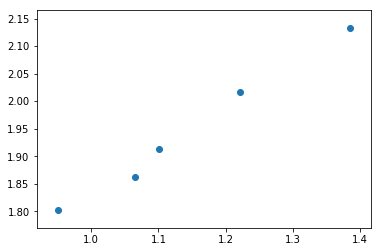

In [3]:
plt.scatter(x,y)

## 数据分析 Data Analysis
看样子像一条直线

## 算法采用 Algorithm

铁三角：

模型 Model

损失函数 Cost Function

优化方法 Optimization Method 

模型 -> 损失函数 -> 优化方法

In [4]:
def model(a, b, x):
    return a*x + b

def cost_function(a, b, x, y):
    n = 5
    return 0.5/n * (np.square(y-a*x-b)).sum()

def optimize(a,b,x,y):
    n = 5
    alpha = 1e-1
    y_hat = model(a,b,x)
    da = (1.0/n) * ((y_hat-y)*x).sum()
    db = (1.0/n) * ((y_hat-y).sum())
    a = a - alpha*da
    b = b - alpha*db
    return a, b


初始化

In [5]:
a = 0
b = 0

第一次遍历

In [6]:
def iterate(a,b,x,y,times):
    for i in range(times):
        a,b = optimize(a,b,x,y)

    y_hat=model(a,b,x)
    cost = cost_function(a, b, x, y)
    print a,b,cost
    plt.scatter(x,y)
    plt.plot(x,y_hat)
    return a,b

0.2244150158 0.194538 1.11951362049


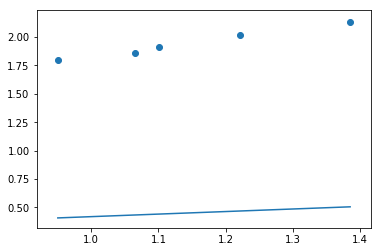

In [7]:
a,b = iterate(a,b,x,y,1)

继续遍历

0.767894485457 0.666536370421 0.0800092729657


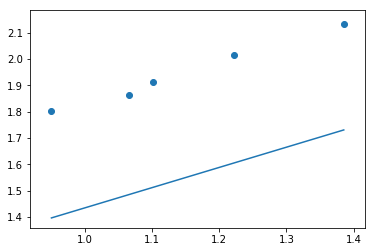

In [8]:
a,b = iterate(a,b,x,y,5)

0.950107846092 0.827588932511 0.000808072467982


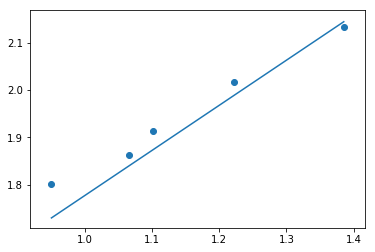

In [9]:
a,b = iterate(a,b,x,y,10)

0.948331105475 0.858098002396 0.000346652841378


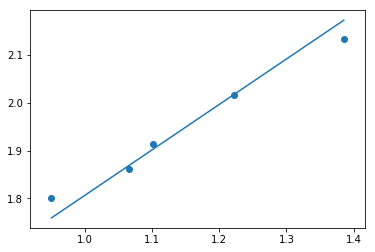

In [10]:
a,b = iterate(a,b,x,y,100)

0.850556078508 0.971087202354 0.000107102645696


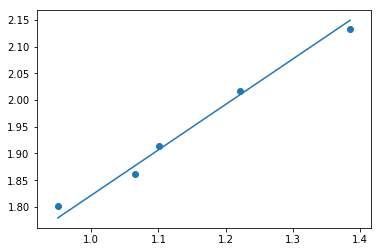

In [11]:
a,b = iterate(a,b,x,y,1000)

0.788470712633 1.04283329169 6.45477932496e-05


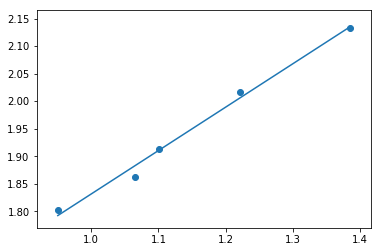

In [12]:
a,b = iterate(a,b,x,y,10000)

## 模型评价
计算R平方

In [13]:
y_hat=model(a,b,x)
y_bar = y.mean()
SST = np.square(y - y_bar).sum()
SSR = np.square(y_hat - y_bar).sum()
SSE = np.square(y_hat - y).sum()
SST, SSR, SSE

(0.068897367999999959, 0.068252729679827609, 0.00064547793249568591)

In [16]:
y_hat

array([[ 2.13518062],
       [ 2.00579257],
       [ 1.9108607 ],
       [ 1.88294884],
       [ 1.79211701]])

In [17]:

y_hat-y

array([[ 0.00198062],
       [-0.01040743],
       [-0.0029393 ],
       [ 0.02084884],
       [-0.00948299]])

证明 SST=SSR+SSE

In [14]:
error = SST - SSR -SSE
error

-8.3961232333600727e-07

In [15]:
R_Square = SSR/SST
R_Square

0.99064349859965117

## 附录1 损失函数的微分（可选）

In [2]:
import sympy

In [3]:
a = sympy.Symbol("a")
b = sympy.Symbol("b")
x = sympy.Symbol("x")
y = sympy.Symbol("y")

In [4]:
f_cost = 1.0/2 * (y - a*x - b)**2

In [7]:
f_cost

0.5*(-a*x - b + y)**2

In [5]:
sympy.diff(f_cost,a)

-1.0*x*(-a*x - b + y)

In [6]:
sympy.diff(f_cost,b)

1.0*a*x + 1.0*b - 1.0*y